In this assignment, you will read in a text file in which each line describes a world city, store the information about each city in its own object within a list, sort the list using quicksort, write the results out to a file, and display part of the output file in a visualization on a world map.

In [1]:
#0. Import all necessary libraries

import matplotlib.pyplot as plt #to display the image
from IPython import display #to display the animation
import time #for a smooth transition of the gif

In [2]:
#1. Define a City class. 

#Each City object will need the following instance variables:
#country code (two-letter string)
#city name (string)
#region (two-character string)
#population (int)
#latitude (float)
#longitude (float)
class City:
    #The __init__ method takes six parameters (plus self) and stores each in the appropriate instance variable. 
    def __init__(self, country_code, city_name, region, population, latitude, longitude):
        self.country_code = country_code 
        self.city_name = city_name 
        self.region = region 
        self.population = int(population)
        self.latitude = float(latitude) 
        self.longitude = float(longitude) 
        
    #The __str__ method returns a string consisting of the city's name, population, latitude, and longitude,
    #separated by commas and with no spaces around the commas.    
    def __str__(self):  
        return self.city_name + "," + str(self.population) + "," + str(self.latitude) + "," + str(self.longitude)
    
    #get_population returns the corresponding population value
    def get_population (self):
        return self.population 
    
    #get_latitude returns the corresponding latitude value    
    def get_latitude (self):
        return self.latitude
    
    #get_name returns the corresponding city name value  
    def get_name (self):
        return self.city_name

In [3]:
#2. Build a list of 47,913 references to City objects.

city_list = [] #empty list
with open("world_cities.txt","r") as file: #open to read the world_cities.txt file
    for line in file: #for loop to fill list
        stripped_line = line.strip()
        line_list = stripped_line.split(",") #call the split method to separate line into individual components.
        #call the City constructor with these components for each line of the file
        city_list.append(
            City(line_list[0],line_list[1],line_list[2],int(line_list[3]),float(line_list [4]),float(line_list [5])))
file.close()

In [4]:
#3. Sort our list of objects based on name, population, or latitude (quicksort algorithm).

# Partition the sublist the_list[p ... r] so that the pivot
# (originally in the_list[r]) moves to the_list[q],
# all items in the_list[p ... q-1] are less than or equal to the pivot,
# and all items in the_list[q+1 ... r] are greater than the pivot.
# Return the index q where the pivot ends up.
def partition(the_list, p, r, compare_func):
    pivot = the_list[r]
    
    # Set up the indices i and j so that
    #    the_list[p ... i] contains items <= pivot,
    #    the_list[i+1 ... j-1] contains items > pivot, and
    #    the_list[j ... r-1] contains items not yet compared with the pivot.
    i = p - 1
    j = p
    while j < r:
        if compare_func(the_list[j], pivot):
            # Move this item into the section known to be <= pivot.
            i += 1
            (the_list[i], the_list[j]) = (the_list[j], the_list[i])
        j += 1
            
    # Get the pivot into the correct position.
    (the_list[i+1], the_list[r]) = (the_list[r], the_list[i+1])
    return i+1

# Sort the sublist the_list[p ... r] using the quicksort algorithm.
def quicksort(the_list, p, r, compare_func):
    if p < r:   # nothing to do if the sublist has fewer than 2 items
        q = partition(the_list, p, r, compare_func) # divide
        quicksort(the_list, p, q-1, compare_func)   # conquer smaller items
        quicksort(the_list, q+1, r, compare_func)   # conquer larger items

# Sort the_list by running quicksort on it.        
def sort(the_list, compare_func):
    quicksort(the_list, 0, len(the_list)-1, compare_func)

# Return True if city1 has the same or higher population than city2.
def compare_population(city1, city2):
    return city1.get_population() >= city2.get_population()

# Return True if city1 comes at or before city2 alphabetically.
def compare_name(city1, city2):
    return city1.get_name().lower() <= city2.get_name().lower()

# Return True if city1's latitude is less than or equal to city2's latitude.
def compare_latitude(city1, city2):
    return city1.get_latitude() <= city2.get_latitude()

In [5]:
#3.1 Sort cities alpabetically

sort(city_list, compare_name) 
with open("cities_alpha.txt","w") as f:
    for city in city_list: #looping through the list of city objects
        i = city.__str__()+'\n' #add a line break from and have one line per city object
        f.write(i) #writing on the file the objects by name
f.close()

In [6]:
#3.2 Sort cities by latitude

sort(city_list, compare_latitude) 
with open("cities_latitude.txt","w") as f:
    for city in city_list:
        i = city.__str__()+'\n'
        f.write(i) #writing on the file the objects by latitude
f.close()

In [7]:
#3.3 Sort cities by population

sort(city_list, compare_population) 
with open("cities_population.txt","w") as f:
    for city in city_list: 
        i = city.__str__()+'\n'
        f.write(i) #writing on the file the objects by population
f.close()

In [8]:
#4.0 Convert a latitude and longitude to pixel locations.

# WIDTH & HEIGHT should be defined to be the size of the image (in pixels)
def longlat_to_pixel(latitude, longitude):
    center_x = int(round((WIDTH / 2) + (WIDTH / 2) * (longitude / 180)))
    center_y = HEIGHT - int(round((HEIGHT / 2) + (HEIGHT / 2) * (latitude / 90)))
    return (center_x, center_y)

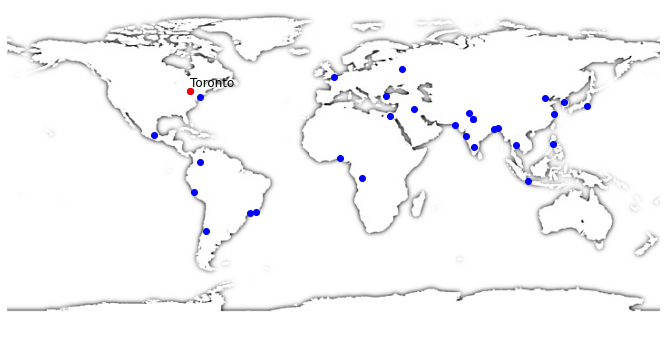

In [11]:
#4.1 Data Visualisation from the text file to the world.jpg animation 

city_pop = [] #creating an empty list
with open("cities_population.txt","r") as file:
    for line in file: #for loop to fill list
        stripped_line = line.strip()
        line_list = stripped_line.split(",") #splitting at commas
        city_pop.append((line_list[0],line_list[1],line_list[2],line_list[3]))

#attributes of the world.png image
WIDTH = 720  #image width
HEIGHT = 360 #image height
DPI = 60     #dots-per-inch

displayed_cities = [] #an empty list to store the cities that were displayed on the gif 
counter = 0 #initializing my counter
for city in city_pop:   
    if counter == 30: #displaying the 30 most populous cities 
        break
    img = plt.imread("world.jpg")
    plt.figure(figsize=(WIDTH/DPI,HEIGHT/DPI))
    plt.imshow(img) #shows picture 
    lat, long = longlat_to_pixel( float(city[2]), float(city[3]) )
    displayed_cities.append(city)
    for point in displayed_cities: 
        lat1, long1 = longlat_to_pixel( float(point[2]), float(point[3]) )
        plt.plot(lat1, long1, 'bo') # display the blue dots for already shown cities
    plt.plot(lat, long, 'ro') # display red dots on the currently shown city 
    plt.text(lat, long-5, city[0], fontsize=12) #annotate the red dot with the name of the city being displayed
    plt.axis('off')
    plt.show()
    display.clear_output(wait=True) # Clears the output
    time.sleep(0.5) # Holds for 0.5 seconds
    counter +=1 #increment from 1-30 